In [2]:
#!/opt/conda/env Python3
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')


In [3]:
# get experiment temperature information
fridge = np.genfromtxt(fname='fridgeData3.txt', delimiter = ',', names=["Index", "APDS Light Sensor", "ADC Bare Thermistor", "R Bare Thermistor", "Bare Thermistor", "HS Thermometer", "LPS Thermometer", "uP Thermometer"])

In [4]:
# just take a looksiedaisy there
print(fridge[0:20])

[( 0., 75., 1724., 45.52, 15.75, 15.55,  0.  , 16.75)
 ( 1., 75., 1721., 45.66, 15.69, 15.57, 15.22, 16.75)
 ( 2., 70., 1715., 45.93, 15.56, 15.56, 15.25, 16.75)
 ( 3., 73., 1714., 45.98, 15.53, 15.55, 15.24, 16.75)
 ( 4., 75., 1714., 45.98, 15.53, 15.53, 15.22, 16.75)
 ( 5., 83., 1708., 46.26, 15.4 , 15.53, 15.21, 16.75)
 ( 6., 80., 1708., 46.26, 15.4 , 15.5 , 15.2 , 16.75)
 ( 7., 75., 1704., 46.44, 15.32, 15.49, 15.19, 16.75)
 ( 8., 76., 1708., 46.26, 15.4 , 15.49, 15.17, 17.  )
 ( 9., 80., 1704., 46.44, 15.32, 15.49, 15.17, 16.75)
 (10., 77., 1701., 46.59, 15.25, 15.48, 15.16, 16.5 )
 (11., 74., 1701., 46.59, 15.25, 15.48, 15.15, 16.5 )
 (12., 77., 1702., 46.54, 15.27, 15.46, 15.14, 16.5 )
 (13., 79., 1703., 46.49, 15.3 , 15.45, 15.13, 16.5 )
 (14., 78., 1695., 46.87, 15.12, 15.45, 15.12, 17.  )
 (15., 78., 1700., 46.63, 15.23, 15.45, 15.12, 16.5 )
 (16., 74., 1699., 46.68, 15.21, 15.43, 15.11, 16.5 )
 (17., 71., 1705., 46.4 , 15.34, 15.42, 15.11, 16.5 )
 (18., 72., 1703., 46.49, 15

In [8]:
# take and label things
index = fridge["Index"]
light = fridge["APDS_Light_Sensor"]
baretemp = fridge["Bare_Thermistor"]
HStemp = fridge["HS_Thermometer"]
LPStemp = fridge["LPS_Thermometer"]
uPtemp = fridge["uP_Thermometer"]

In [6]:
# CHANGE HERE HOW LONG EXPERIMENT LASTED
exp_minutes = 240
exp_secs = exp_minutes*60
# multiplying factor for converting index to time
dt = exp_secs / index.size
print(dt)

10.0


In [7]:
# for approximating: 
# iterate thru each thermometer, look for the first time (Tenv-Ti) < 0.368 * (Tenv-T0)
# report that index and break from the loop
# then we plot them all over top
lowlightind, lowlight = index[light < 5], light < 5
print(lowlightind[0])
print(lowlightind[-1])
cold_st = int(lowlightind[0])
cold_end = int(lowlightind[-1])
coldind = np.arange(cold_st, cold_end+1)
warmind = np.arange(cold_end, index.size)
# warm end is implied by end of experiment

76.0
914.0


In [19]:
# Coldifying temp curve
coldbaretempTest = baretemp[cold_st:cold_end+1]

# get better start position
cold_stNew = coldbaretempTest[:100].argmax() + cold_st
coldindnew = np.arange(cold_stNew, cold_end+1)

warm_stNew = baretemp[cold_end:cold_end+500].argmin() + cold_end
warmindNew = np.arange(warm_stNew, index.size)
warm_endNew = baretemp[cold_end:].argmax() + cold_end + 1

coldbaretemp = baretemp[cold_stNew:cold_end+1]
coldHStemp = HStemp[cold_stNew:cold_end+1]
coldLPStemp = LPStemp[cold_stNew:cold_end+1]
colduPtemp = uPtemp[cold_stNew:cold_end+1]

# Warmifying temp curve
warmbaretemp = baretemp[cold_end:warm_endNew+1]
warmHStemp = HStemp[cold_end:warm_endNew+1]
warmLPStemp = LPStemp[cold_end:warm_endNew+1]
warmuPtemp = uPtemp[cold_end:warm_endNew+1]
print(coldbaretemp.size)

825


In [20]:
# Set up the chosen bare temperatures
stwarmbaretemp = coldbaretemp[0]
eqcoldbaretemp = coldbaretemp[-1]
endwarmbaretemp = warmbaretemp[-1]
stwarmHStemp = coldHStemp[0]
eqcoldHStemp = coldHStemp[-1]
endwarmHStemp = warmHStemp[-1]
stwarmLPStemp = coldLPStemp[0]
eqcoldLPStemp = coldLPStemp[-1]
endwarmLPStemp = warmLPStemp[-1]
stwarmuPtemp = colduPtemp[0]
eqcolduPtemp = colduPtemp[-1]
endwarmuPtemp = warmuPtemp[-1]


In [21]:
# find the change in index by time constant
dindtaucoldbaretemp = coldindnew[(coldbaretemp < (0.37 * (stwarmbaretemp - eqcoldbaretemp) + eqcoldbaretemp))][0] - cold_st
dindtaucoldHStemp = coldindnew[(coldHStemp < (0.37 * (stwarmHStemp - eqcoldHStemp) + eqcoldHStemp))][0] - cold_st
dindtaucoldLPStemp = coldindnew[(coldLPStemp < (0.37 * (stwarmLPStemp - eqcoldLPStemp) + eqcoldLPStemp))][0] - cold_st
dindtaucolduPtemp = coldindnew[(colduPtemp < (0.37 * (stwarmuPtemp - eqcolduPtemp) + eqcolduPtemp))][0] - cold_st

print("Approximate time constants for cooling:")
print(f"Bare Thermistor: {dindtaucoldbaretemp * dt}s")
print(f"HS Thermometer: {dindtaucoldHStemp * dt}s")
print(f"LPS Thermometer: {dindtaucoldLPStemp * dt}s")
print(f"uP Thermometer: {dindtaucolduPtemp * dt}s")

# find the change in index by time constant
dindtauwarmbaretemp = warmind[(warmbaretemp < (0.37 * (eqcoldbaretemp - endwarmbaretemp) + endwarmbaretemp))][0] - cold_end
dindtauwarmHStemp = warmind[(warmHStemp < (0.37 * (eqcoldHStemp - endwarmHStemp) + endwarmHStemp))][0] - cold_end
dindtauwarmLPStemp = warmind[(warmLPStemp < (0.37 * (eqcoldLPStemp - endwarmLPStemp) + endwarmLPStemp))][0] - cold_end
dindtauwarmuPtemp = warmind[(warmuPtemp < (0.37 * (eqcolduPtemp - endwarmuPtemp) + endwarmuPtemp))][0] - cold_end

print("Approximate time constants for warming:")
print(f"Bare Thermistor: {dindtaucoldbaretemp * dt}s")
print(f"HS Thermometer: {dindtaucoldHStemp * dt}s")
print(f"LPS Thermometer: {dindtaucoldLPStemp * dt}s")
print(f"uP Thermometer: {dindtaucolduPtemp * dt}s")

# bare thermistor heated up :(

Approximate time constants for cooling:
Bare Thermistor: 930.0s
HS Thermometer: 1220.0s
LPS Thermometer: 1210.0s
uP Thermometer: 1300.0s
Approximate time constants for warming:
Bare Thermistor: 930.0s
HS Thermometer: 1220.0s
LPS Thermometer: 1210.0s
uP Thermometer: 1300.0s


In [22]:
# bare thermistor correction element in case lucille fucked up and didnt input the right data
# PLUS in case it does something weird for some reason
coldbarest = coldbaretemp[:100].argmax() + cold_st
dindtaucoldbaretempnew = coldind[coldbarest:][(coldbaretemp[coldbarest:] < (0.37 * (stwarmbaretemp - eqcoldbaretemp) + eqcoldbaretemp))][0] - coldbarest
#dindtauwarmbaretempnew = warmind[cold_end:][(warmbaretemp[cold_end:] > (0.37 * (warmbaretemp - endwarmbaretemp) + endwarmbaretemp))][0] - cold_end
print("Approximate cold time constant:")
print(f"Bare Thermistor: {dindtaucoldbaretempnew * dt}s")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 763 but corresponding boolean dimension is 749

Text(0.5, 1.0, 'Instrument Temperature for Cold Experiment over time')

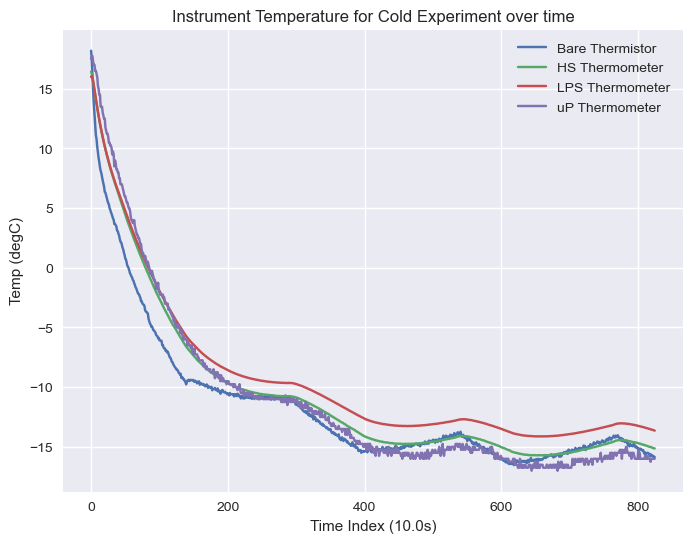

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(coldbaretemp, label='Bare Thermistor')
ax.plot(coldHStemp, label='HS Thermometer')
ax.plot(coldLPStemp, label='LPS Thermometer')
ax.plot(colduPtemp, label='uP Thermometer')
ax.legend(loc='best')
ax.set_xlabel(f"Time Index ({dt}s)")
ax.set_ylabel("Temp (degC)")
ax.set_title("Instrument Temperature for Cold Experiment over time")

393
393
1360.8257122325995


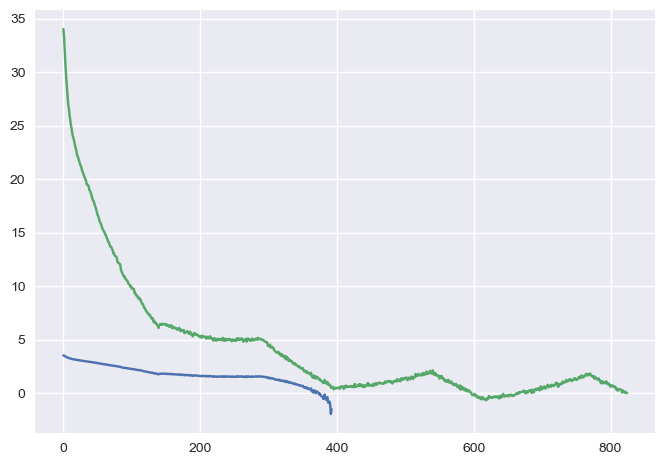

In [24]:
# T(t)=(T_s-T_e)e^{-t/\tau}+T_e
# (T(t) - T_e)/(T_s-T_e) = e^-t*tau
# ln((T(t)-T_e)/(T_s-T_e)) = -t*tau
# t(ln(T(t)-T_e)-ln(T_s-T_e))=tau
# find time constant here by plotting stuff against t
coldindlog = np.arange(coldbaretemp[:400].argmin()-2)
coldbarelogt = coldbaretemp[:coldbaretemp[:400].argmin()-2]
eqcoldbarelogt = coldbaretemp[coldbaretemp[:400].argmin()]

y = np.log(coldbarelogt - eqcoldbarelogt-0.01)
t = (coldindlog * dt)
print(t.size)
print(y.size)
coefs = np.polyfit(t, y, deg=1)
print(-1/coefs[0])
plt.plot(y)
plt.plot(coldbaretemp - eqcoldbaretemp)

524
524
1229.9311146133875


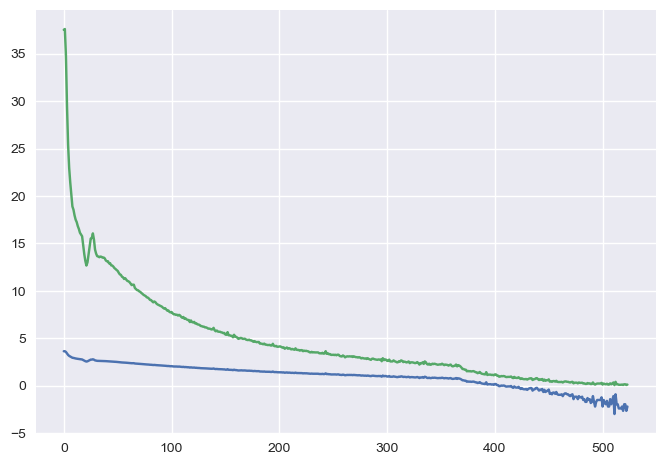

In [25]:
warmindlog = np.arange(warmbaretemp.argmax())
warmbarelogt = warmbaretemp[:warmbaretemp.argmax()]
endwarmbarelogt = warmbaretemp[warmbaretemp.argmax()]

y = np.log((endwarmbarelogt) - warmbarelogt)
t = (warmindlog * dt)
print(t.size)
print(y.size)
coefs = np.polyfit(t, y, deg=1)
print(-1/coefs[0])
plt.plot(y)
plt.plot(endwarmbarelogt - warmbarelogt)

Text(0.5, 1.0, 'Instrument Temperature for Warm Experiment over time')

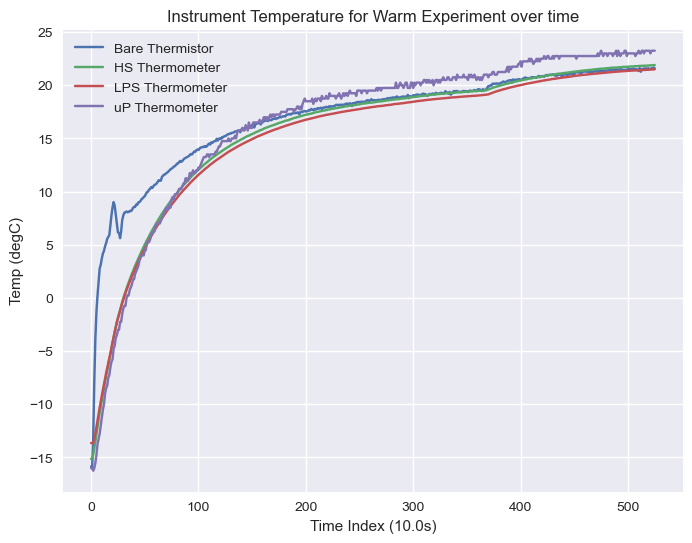

In [28]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(warmbaretemp, label='Bare Thermistor')
ax.plot(warmHStemp, label='HS Thermometer')
ax.plot(warmLPStemp, label='LPS Thermometer')
ax.plot(warmuPtemp, label='uP Thermometer')
ax.legend(loc='best')
ax.set_xlabel(f"Time Index ({dt}s)")
ax.set_ylabel("Temp (degC)")
ax.set_title("Instrument Temperature for Warm Experiment over time")

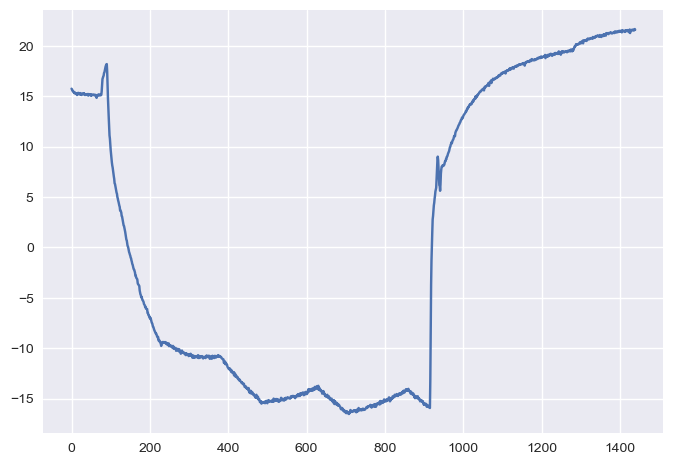

In [ ]:
plt.plot(baretemp)